# Modern Portfolio Optimization

###  Диверсификация

Модель портфельных инвестиций была сформулирована Гарри Марковицом в 1950 году.

В чём заключается идея? 

Идея в том, что вкладывая деньги в один актив становится непредсказуемым явлением, мы полностью зависим от того как будет вести себя эта акция. Но зато мы можем распределить денежные средства по нескольким активам. Тем самым мы снизим наш риск инвестиций насколько это возможно. Это явление называется диверсификацией портфеля.

Данная модель имеет два предположения:

$\cdot$ Доходности акций распределяются так, чтобы описать нормальное распределение.

$\cdot$ Инвесторы ожидают увеличение доход с увеличением риска.

Таким образом инвесторы могут сформулировать портфель с максимальным доходом на основе уровня риска, который они готовы принять.

### Математическое описание модели

Введём несколько обозначений:

$w_i$ - вес актива $i$-го актива.

$r_i$ - доходность $i$-го актива, подсчитанная на исторической выборке данных.

$\mu_i$ - ожидаемая доходность $i$-го актива.

Доходность вы считаем по следующей формуле:

$$\frac{P_n - P_{n-1}}{P_n} \cdot 100$%$$ где:

$P_n$ - цена акции в день $n$

Наша модель в значительной степени опирается на исторические данные. Историческая выборка является лучшей оценкой для будущей производительности.

$$\mu_{портфеля} = E(\sum_i w_i \cdot r_i) = \sum_i w_i E(r_i) = \sum_i w_i \cdot \mu_i = w^T \mu  $$

### Риск портфеля

Волатильность связана со стандартным отклонением и дисперсией.

$\sigma_{ij} = E[(r_i - \mu_j)\cdot (r_j - \mu_i)]$ - ковариация

$\sigma^2 = E[(r_i - \mu_i)^2]$ - дисперсия

Для расчёта дисперсии портфеля нам понадобится ковариационная матрица, содержащая все ковариации акций, входящих в портфель. 

![cov](cov.png "cov")

Матрица ковариации содержит отношения между всеми акицями в портфеле.

$$\sigma_{портфеля}^2 = E[(r_i - \mu_i)^2] = \sum_i \sum_j w_i\cdot w_j\cdot \sigma_{ij} = w^T\sum w $$

Ковариация измеряет насколько две случайные величины изменяются вместе. Отрицательная ковариация означает обратное движение, а положительная означает, что доходность активов движется вместе.

Теория Марковица о диверсификации: обладание активами с высокой положительной ковариацией не обеспечивает большой диверсификации. Цель диверсификации заключается в том, чтобы устранить колебания в долгосрочной перспективе, поэтому некоррелированные акции лучше.

### Эффективная граница

![ef](ef.png "ef")

Точки на графике представляют разные веса $\to$ разные портфели

Инвестор заинтересован в: 

$1) $ Максимальном доходе при фиксированном уровне риска.

$2) $ Минимальном риске при фиксированном уровне дохода.

Эти портфели составляют так называемую "эффективную границу"

Это основная особенность модели Макровица: инвестор может определить ожидаемый риск или доход.

$\to$ базовое правило: Если вы хотите получить доход, вам придется рисковать.

### Коэффицент Шарпа

Коэффицент Шарпа это одна из самых важных мер риска или доходности, используемых в финансах. Уильям Шарп использовал этот параметр.

Коэффициент Шарпа используется для определения того, насколько хорошо доходность актива компенсирует принимаемый инвестором риск. При сравнении двух активов с одинаковым ожидаемым доходом, вложение в актив с более высоким коэффициентом Шарпа будет менее рискованным.

$$ S(x) = \frac{r_x - R_f}{StdDev(x)}   $$

$r_x$  – средняя норма доходности инвестиций.

$R_f$ - норма доходности безрисковой ценной бумаги.

Коэффицент Шарпа $S(x) > 1$ считается хорошим.

### Линия распределния капитала

![cal](cal.png "cal")

Ранее мы говорили про коэффицент Шарпа и определили, что чем больше коэффицент Шарпа, тем лучше портфель.
Но мы также должны рассмотреть государственные бумаги в том случае, если инвестор не готов идти на риск (risk-free asset)
Получив две точки, можем соединить их прямой. Это и будет линией распределения капитала. Эта линия доходность безрискового актива с портфелем максимального коэффицента Шарпа. Таким образом наиболее оптимальные портфели лежат на линии распределения капитала.

Мы получили теоретическое обоснование этой модели, попробуем реализовать её:

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get stocks FAANG
assets = ['DAL','AAL','CCL','JNJ','DIS']

In [3]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
#Get the stock start date
stockStartDate = '2013-01-01'
# Get the stocks end
today = datetime.today().strftime('%Y-%m-%d')

In [5]:
#Create a dataframe
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [6]:
#df

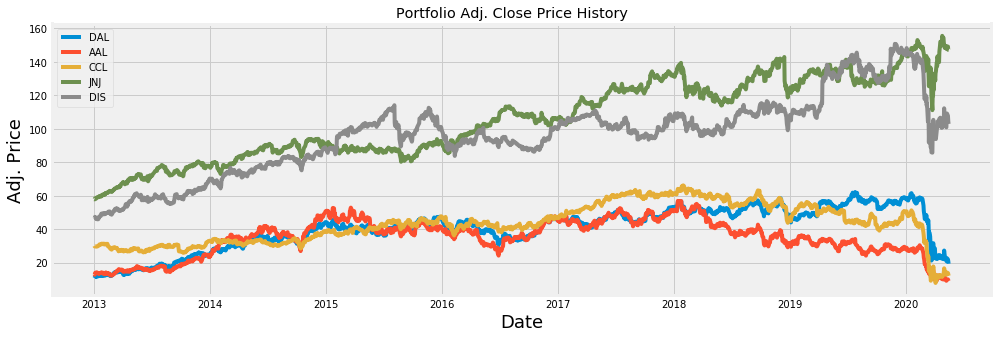

In [9]:
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(15,5))
for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [10]:
returns = df.pct_change()
#returns

In [11]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,DAL,AAL,CCL,JNJ,DIS
DAL,0.136339,0.130810,0.086693,0.019890,0.040600
AAL,0.130810,0.198901,0.093769,0.020392,0.042677
CCL,0.086693,0.093769,0.164862,0.020124,0.046322
JNJ,0.019890,0.020392,0.020124,0.032866,0.017989
DIS,0.040600,0.042677,0.046322,0.017989,0.054991


In [12]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06505972488784122

In [13]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.25506807892764866

In [14]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.08837248401878862

In [15]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 9.0%
Annual volatility/standard deviation/risk : 26.0%
Annual variance : 7.000000000000001%


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [17]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df)

In [19]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'DAL': 0.04925, 'AAL': 0.0, 'CCL': 0.0, 'JNJ': 0.73196, 'DIS': 0.21879}
Expected annual return: 14.2%
Annual volatility: 16.9%
Sharpe Ratio: 0.72


(0.1418208187978201, 0.1692404654031359, 0.7198090510306695)

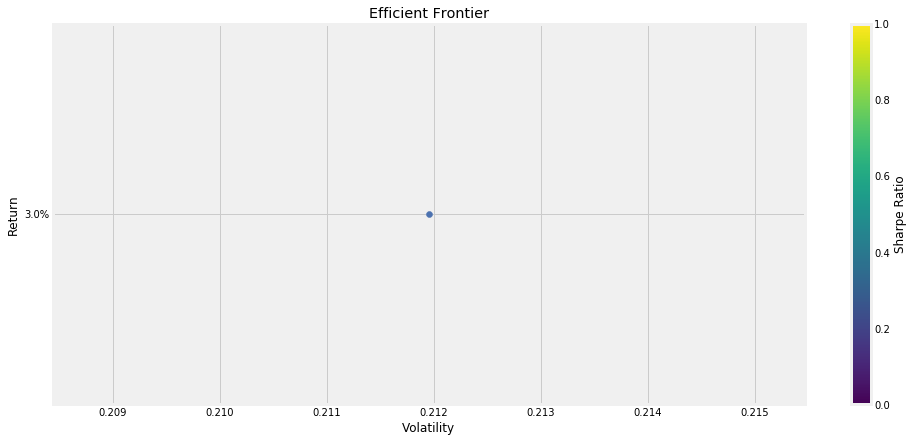

In [26]:
plt.figure(figsize=(15,7))
plt.scatter(x=port_volatility, y=percent_ret, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()